In [1]:
import pandas as pd
import numpy as np
import pandas_ta as ta

In [2]:
#read data
df=pd.read_csv("/Users/luzhang/Desktop/data/QQQ.csv")
df = pd.DataFrame(df)
df

,time,open,high,low,close,volume
0,2007-04-25 15:41:00,46.2500,46.2700,46.25,46.27,199439.0
1,2007-04-25 15:42:00,46.2695,46.2695,46.25,46.26,214239.0
2,2007-04-25 15:43:00,46.2600,46.2600,46.24,46.25,243695.0
3,2007-04-25 15:44:00,46.2500,46.2600,46.24,46.25,352069.0
4,2007-04-25 15:45:00,46.2600,46.2600,46.25,46.26,10900.0
...,...,...,...,...,...,...
1704250,2018-11-01 20:59:00,171.0300,171.0300,171.03,171.03,100.0
1704251,2018-11-01 21:28:00,170.9400,170.9400,170.94,170.94,100.0
1704252,2018-11-01 21:29:00,170.9200,170.9200,170.92,170.92,200.0
1704253,2018-11-01 22:07:00,170.5000,170.5000,170.50,170.50,500.0


In [6]:
def DropOutlierday(data):
    # subset dataframe such that it only contains the complete transcation
    totalDay=pd.to_datetime(data.index.date).unique()
    completeDay=totalDay[day_keep]

    outlierday=totalDay.difference(completeDay)
    data['date'] = [d.date() for d in data.index]

    outlierday=outlierday.strftime('%Y-%m-%d')
    t=pd.DataFrame()
    
    for i in range(len(outlierday)):
        temp=pd.DataFrame(data['date'].loc[outlierday[i]])
        t=t.append(temp)
    
    data = data.drop(t.index) # drop the outlier day
    data = data.drop('date',1) # delete columne 'date'
    return data

### Retuns Calculation

In [3]:
# data pre-cessing
#change sereis to datetime format
df['time']=pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

In [9]:
#subset df to calculate LH, LH0 and ROD
df_LH_ROD = df[((df.index.hour == 15) & (df.index.minute == 30))|
        ((df.index.hour == 16) & (df.index.minute == 0))]
df_LH_ROD

,open,high,low,close,volume
time,,,,,
2007-04-25 16:00:00,46.280,46.28,46.260,46.27,682148.0
2007-04-26 15:30:00,46.580,46.59,46.570,46.59,38575.0
2007-04-26 16:00:00,46.480,46.48,46.440,46.44,1051977.0
2007-04-27 15:30:00,46.480,46.49,46.480,46.49,61000.0
2007-04-27 16:00:00,46.500,46.52,46.490,46.51,870558.0
...,...,...,...,...,...
2018-10-30 16:00:00,165.935,165.99,165.750,165.86,1348669.0
2018-10-31 15:30:00,170.535,170.80,170.515,170.78,131251.0
2018-10-31 16:00:00,169.920,169.94,169.630,169.66,1318913.0


In [10]:
# find the complete transaction
rows_eachday = df_LH_ROD.groupby(df_LH_ROD.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2878

In [11]:
df_LH_ROD = DropOutlierday(df_LH_ROD)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3023528149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3023528149.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [12]:
df_LH_ROD

,open,high,low,close,volume
time,,,,,
2007-04-26 15:30:00,46.5800,46.59,46.570,46.59,38575.0
2007-04-26 16:00:00,46.4800,46.48,46.440,46.44,1051977.0
2007-04-27 15:30:00,46.4800,46.49,46.480,46.49,61000.0
2007-04-27 16:00:00,46.5000,46.52,46.490,46.51,870558.0
2007-04-30 15:30:00,46.1019,46.12,46.100,46.11,83579.0
...,...,...,...,...,...
2018-10-30 16:00:00,165.9350,165.99,165.750,165.86,1348669.0
2018-10-31 15:30:00,170.5350,170.80,170.515,170.78,131251.0
2018-10-31 16:00:00,169.9200,169.94,169.630,169.66,1318913.0


In [13]:
df_LH_ROD['returns'] = df_LH_ROD['close'].pct_change();
df_LH_ROD

,open,high,low,close,volume,returns
time,,,,,,
2007-04-26 15:30:00,46.5800,46.59,46.570,46.59,38575.0,NaN
2007-04-26 16:00:00,46.4800,46.48,46.440,46.44,1051977.0,-0.003220
2007-04-27 15:30:00,46.4800,46.49,46.480,46.49,61000.0,0.001077
2007-04-27 16:00:00,46.5000,46.52,46.490,46.51,870558.0,0.000430
2007-04-30 15:30:00,46.1019,46.12,46.100,46.11,83579.0,-0.008600
...,...,...,...,...,...,...
2018-10-30 16:00:00,165.9350,165.99,165.750,165.86,1348669.0,0.003327
2018-10-31 15:30:00,170.5350,170.80,170.515,170.78,131251.0,0.029664
2018-10-31 16:00:00,169.9200,169.94,169.630,169.66,1318913.0,-0.006558


In [14]:
df_LH=df_LH_ROD[((df_LH_ROD.index.hour == 16) & (df_LH_ROD.index.minute == 0))]
df_LH=df_LH.drop(['open','high','low','close','volume'],1)
df_LH = df_LH.rename(columns={"returns":"R_LH"})
df_LH

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3991369880.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_LH=df_LH.drop(['open','high','low','close','volume'],1)


,R_LH
time,
2007-04-26 16:00:00,-0.003220
2007-04-27 16:00:00,0.000430
2007-04-30 16:00:00,-0.003253
2007-05-01 16:00:00,0.002393
2007-05-02 16:00:00,-0.000742
...,...
2018-10-26 16:00:00,0.001802
2018-10-29 16:00:00,0.009122
2018-10-30 16:00:00,0.003327


In [15]:
df_LH0=df_LH.shift()
df_LH0=df_LH0.rename(columns={'R_LH':'R_LH0'})
df_LH0

,R_LH0
time,
2007-04-26 16:00:00,NaN
2007-04-27 16:00:00,-0.003220
2007-04-30 16:00:00,0.000430
2007-05-01 16:00:00,-0.003253
2007-05-02 16:00:00,0.002393
...,...
2018-10-26 16:00:00,-0.004774
2018-10-29 16:00:00,0.001802
2018-10-30 16:00:00,0.009122


In [16]:
df_ROD=df_LH_ROD[((df_LH_ROD.index.hour == 15) & (df_LH_ROD.index.minute == 30))]
df_ROD=df_ROD.drop(['open','high','low','close','volume'],1)
df_ROD=df_ROD.rename(columns={'returns':'R_ROD'})
df_ROD

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/2940247541.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_ROD=df_ROD.drop(['open','high','low','close','volume'],1)


,R_ROD
time,
2007-04-26 15:30:00,NaN
2007-04-27 15:30:00,0.001077
2007-04-30 15:30:00,-0.008600
2007-05-01 15:30:00,0.000000
2007-05-02 15:30:00,0.009106
...,...
2018-10-26 15:30:00,-0.026146
2018-10-29 15:30:00,-0.027280
2018-10-30 15:30:00,0.009712


In [17]:
df_ON=df[((df.index.hour == 9) & (df.index.minute == 31))|
        ((df.index.hour == 16) & (df.index.minute == 0))]
# Larry: 9:31 is the data for the first minute which is better than using the data for 9:29~9:30
df_ON

,open,high,low,close,volume
time,,,,,
2007-04-25 16:00:00,46.280,46.28,46.26,46.27,682148.0
2007-04-26 09:31:00,46.420,46.45,46.41,46.44,1192967.0
2007-04-26 16:00:00,46.480,46.48,46.44,46.44,1051977.0
2007-04-27 09:31:00,46.370,46.40,46.37,46.38,636731.0
2007-04-27 16:00:00,46.500,46.52,46.49,46.51,870558.0
...,...,...,...,...,...
2018-10-30 16:00:00,165.935,165.99,165.75,165.86,1348669.0
2018-10-31 09:31:00,168.540,168.84,168.54,168.72,668522.0
2018-10-31 16:00:00,169.920,169.94,169.63,169.66,1318913.0


In [18]:
rows_eachday = df_ON.groupby(df_ON.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2881

In [19]:
df_ON = DropOutlierday(df_ON)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3023528149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3023528149.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [20]:
df_ON

,open,high,low,close,volume
time,,,,,
2007-04-26 09:31:00,46.420,46.45,46.41,46.44,1192967.0
2007-04-26 16:00:00,46.480,46.48,46.44,46.44,1051977.0
2007-04-27 09:31:00,46.370,46.40,46.37,46.38,636731.0
2007-04-27 16:00:00,46.500,46.52,46.49,46.51,870558.0
2007-04-30 09:31:00,46.500,46.51,46.44,46.44,521267.0
...,...,...,...,...,...
2018-10-30 16:00:00,165.935,165.99,165.75,165.86,1348669.0
2018-10-31 09:31:00,168.540,168.84,168.54,168.72,668522.0
2018-10-31 16:00:00,169.920,169.94,169.63,169.66,1318913.0


In [21]:
df_ON['close_pre'] = df_ON['close'].shift()

In [22]:
df_ON = df_ON[((df_ON.index.hour == 9) & (df_ON.index.minute == 31))]

In [23]:
df_ON

,open,high,low,close,volume,close_pre
time,,,,,,
2007-04-26 09:31:00,46.42,46.45,46.410,46.44,1192967.0,NaN
2007-04-27 09:31:00,46.37,46.40,46.370,46.38,636731.0,46.44
2007-04-30 09:31:00,46.50,46.51,46.440,46.44,521267.0,46.51
2007-05-01 09:31:00,45.97,46.02,45.960,46.02,726559.0,45.96
2007-05-02 09:31:00,46.09,46.10,46.050,46.07,1239876.0,46.07
...,...,...,...,...,...,...
2018-10-26 09:31:00,165.25,166.15,165.200,166.06,1309434.0,170.96
2018-10-29 09:31:00,169.16,169.54,169.130,169.45,817472.0,166.79
2018-10-30 09:31:00,162.83,162.83,162.015,162.26,763153.0,163.72


In [24]:
df_ON['R_ON'] = df_ON['open']/df_ON['close_pre']-1;
df_ON = df_ON.drop(["open","high","low","close","volume","close_pre"],1)
df_ON

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/2589525367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ON['R_ON'] = df_ON['open']/df_ON['close_pre']-1;
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/2589525367.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_ON = df_ON.drop(["open","high","low","close","volume","close_pre"],1)


,R_ON
time,
2007-04-26 09:31:00,NaN
2007-04-27 09:31:00,-0.001507
2007-04-30 09:31:00,-0.000215
2007-05-01 09:31:00,0.000218
2007-05-02 09:31:00,0.000434
...,...
2018-10-26 09:31:00,-0.033400
2018-10-29 09:31:00,0.014209
2018-10-30 09:31:00,-0.005436


In [25]:
df_FH = df[((df.index.hour == 9) & (df.index.minute == 31))|
        ((df.index.hour == 10) & (df.index.minute == 0))]
# Larry: use 9:31 data
df_FH

,open,high,low,close,volume
time,,,,,
2007-04-26 09:31:00,46.4200,46.45,46.41,46.44,1192967.0
2007-04-26 10:00:00,46.3600,46.37,46.35,46.35,783718.0
2007-04-27 09:31:00,46.3700,46.40,46.37,46.38,636731.0
2007-04-27 10:00:00,46.4305,46.46,46.43,46.45,83858.0
2007-04-30 09:31:00,46.5000,46.51,46.44,46.44,521267.0
...,...,...,...,...,...
2018-10-30 10:00:00,165.4700,165.50,165.10,165.13,545304.0
2018-10-31 09:31:00,168.5400,168.84,168.54,168.72,668522.0
2018-10-31 10:00:00,169.8850,169.95,169.81,169.87,178197.0


In [26]:
rows_eachday = df_FH.groupby(df_FH.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2901

In [27]:
df_FH = DropOutlierday(df_FH)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3023528149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3023528149.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [28]:
df_FH

,open,high,low,close,volume
time,,,,,
2007-04-26 09:31:00,46.4200,46.45,46.41,46.44,1192967.0
2007-04-26 10:00:00,46.3600,46.37,46.35,46.35,783718.0
2007-04-27 09:31:00,46.3700,46.40,46.37,46.38,636731.0
2007-04-27 10:00:00,46.4305,46.46,46.43,46.45,83858.0
2007-04-30 09:31:00,46.5000,46.51,46.44,46.44,521267.0
...,...,...,...,...,...
2018-10-30 10:00:00,165.4700,165.50,165.10,165.13,545304.0
2018-10-31 09:31:00,168.5400,168.84,168.54,168.72,668522.0
2018-10-31 10:00:00,169.8850,169.95,169.81,169.87,178197.0


In [29]:
df_FH['open_pre30']=df_FH['open'].shift()

In [30]:
df_FH=df_FH[(df_FH.index.hour==10)&(df_FH.index.minute==0)]
df_FH

,open,high,low,close,volume,open_pre30
time,,,,,,
2007-04-26 10:00:00,46.3600,46.37,46.35,46.35,783718.0,46.42
2007-04-27 10:00:00,46.4305,46.46,46.43,46.45,83858.0,46.37
2007-04-30 10:00:00,46.3400,46.36,46.34,46.35,164970.0,46.50
2007-05-01 10:00:00,45.8900,45.94,45.88,45.93,777447.0,45.97
2007-05-02 10:00:00,46.2000,46.20,46.19,46.20,130781.0,46.09
...,...,...,...,...,...,...
2018-10-26 10:00:00,167.2800,167.29,166.94,167.00,177891.0,165.25
2018-10-29 10:00:00,168.8900,169.03,168.81,168.93,101751.0,169.16
2018-10-30 10:00:00,165.4700,165.50,165.10,165.13,545304.0,162.83


In [31]:
df_FH['R_FH'] = df_FH['open']/df_FH['open_pre30']-1
df_FH = df_FH.drop(["open","high","low","close","open_pre30",'volume'],1)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/1210239203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FH['R_FH'] = df_FH['open']/df_FH['open_pre30']-1
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/1210239203.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_FH = df_FH.drop(["open","high","low","close","open_pre30",'volume'],1)


In [32]:
df_FH

,R_FH
time,
2007-04-26 10:00:00,-0.001293
2007-04-27 10:00:00,0.001305
2007-04-30 10:00:00,-0.003441
2007-05-01 10:00:00,-0.001740
2007-05-02 10:00:00,0.002387
...,...
2018-10-26 10:00:00,0.012284
2018-10-29 10:00:00,-0.001596
2018-10-30 10:00:00,0.016213


In [33]:
df_ONFH = df[((df.index.hour==16)&(df.index.minute==0))|
            ((df.index.hour==10)&(df.index.minute==0))]
df_ONFH

,open,high,low,close,volume
time,,,,,
2007-04-25 16:00:00,46.2800,46.28,46.26,46.27,682148.0
2007-04-26 10:00:00,46.3600,46.37,46.35,46.35,783718.0
2007-04-26 16:00:00,46.4800,46.48,46.44,46.44,1051977.0
2007-04-27 10:00:00,46.4305,46.46,46.43,46.45,83858.0
2007-04-27 16:00:00,46.5000,46.52,46.49,46.51,870558.0
...,...,...,...,...,...
2018-10-30 16:00:00,165.9350,165.99,165.75,165.86,1348669.0
2018-10-31 10:00:00,169.8850,169.95,169.81,169.87,178197.0
2018-10-31 16:00:00,169.9200,169.94,169.63,169.66,1318913.0


In [34]:
rows_eachday = df_ONFH.groupby(df_ONFH.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2882

In [35]:
df_ONFH = DropOutlierday(df_ONFH)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3023528149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3023528149.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [36]:
df_ONFH

,open,high,low,close,volume
time,,,,,
2007-04-26 10:00:00,46.3600,46.37,46.35,46.35,783718.0
2007-04-26 16:00:00,46.4800,46.48,46.44,46.44,1051977.0
2007-04-27 10:00:00,46.4305,46.46,46.43,46.45,83858.0
2007-04-27 16:00:00,46.5000,46.52,46.49,46.51,870558.0
2007-04-30 10:00:00,46.3400,46.36,46.34,46.35,164970.0
...,...,...,...,...,...
2018-10-30 16:00:00,165.9350,165.99,165.75,165.86,1348669.0
2018-10-31 10:00:00,169.8850,169.95,169.81,169.87,178197.0
2018-10-31 16:00:00,169.9200,169.94,169.63,169.66,1318913.0


In [37]:
df_ONFH['close_preday']=df_ONFH['close'].shift()

In [38]:
df_ONFH=df_ONFH[((df_ONFH.index.hour==10)&(df_ONFH.index.minute==0))]

In [39]:
df_ONFH['R_ONFH']=df_ONFH['open']/df_ONFH['close_preday']-1

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/1058864201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ONFH['R_ONFH']=df_ONFH['open']/df_ONFH['close_preday']-1


In [40]:
df_ONFH = df_ONFH.drop(['open','high','low','close','volume','close_preday'],1)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/2488401400.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_ONFH = df_ONFH.drop(['open','high','low','close','volume','close_preday'],1)


In [41]:
df_ONFH

,R_ONFH
time,
2007-04-26 10:00:00,NaN
2007-04-27 10:00:00,-0.000205
2007-04-30 10:00:00,-0.003655
2007-05-01 10:00:00,-0.001523
2007-05-02 10:00:00,0.002822
...,...
2018-10-26 10:00:00,-0.021526
2018-10-29 10:00:00,0.012591
2018-10-30 10:00:00,0.010689


In [42]:
df_M = df[((df.index.hour==10)&(df.index.minute==0)) |
         ((df.index.hour==15)&(df.index.minute==0))]
df_M

,open,high,low,close,volume
time,,,,,
2007-04-26 10:00:00,46.3600,46.37,46.3500,46.3500,783718.0
2007-04-26 15:00:00,46.5700,46.58,46.5600,46.5725,45830.0
2007-04-27 10:00:00,46.4305,46.46,46.4300,46.4500,83858.0
2007-04-27 15:00:00,46.5200,46.53,46.5100,46.5200,110398.0
2007-04-30 10:00:00,46.3400,46.36,46.3400,46.3500,164970.0
...,...,...,...,...,...
2018-10-30 15:00:00,164.9200,164.98,164.7400,164.8000,138591.0
2018-10-31 10:00:00,169.8850,169.95,169.8100,169.8700,178197.0
2018-10-31 15:00:00,170.7400,170.83,170.7301,170.8200,74184.0


In [43]:
rows_eachday = df_M.groupby(df_M.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2882

In [44]:
df_M = DropOutlierday(df_M)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3023528149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3023528149.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [45]:
df_M

,open,high,low,close,volume
time,,,,,
2007-04-26 10:00:00,46.3600,46.37,46.3500,46.3500,783718.0
2007-04-26 15:00:00,46.5700,46.58,46.5600,46.5725,45830.0
2007-04-27 10:00:00,46.4305,46.46,46.4300,46.4500,83858.0
2007-04-27 15:00:00,46.5200,46.53,46.5100,46.5200,110398.0
2007-04-30 10:00:00,46.3400,46.36,46.3400,46.3500,164970.0
...,...,...,...,...,...
2018-10-30 15:00:00,164.9200,164.98,164.7400,164.8000,138591.0
2018-10-31 10:00:00,169.8850,169.95,169.8100,169.8700,178197.0
2018-10-31 15:00:00,170.7400,170.83,170.7301,170.8200,74184.0


In [46]:
df_M['open_past30'] = df_M['open'].shift()

In [47]:
df_M = df_M[((df_M.index.hour==15)&(df_M.index.minute==0))]

In [48]:
df_M['R_M'] = df_M['close']/df_M['open_past30']-1

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/1719777920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M['R_M'] = df_M['close']/df_M['open_past30']-1


In [49]:
df_M = df_M.drop(['open','high','low','close','open_past30','volume'],1)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/2592150204.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_M = df_M.drop(['open','high','low','close','open_past30','volume'],1)


In [50]:
df_M

,R_M
time,
2007-04-26 15:00:00,0.004584
2007-04-27 15:00:00,0.001928
2007-04-30 15:00:00,-0.004100
2007-05-01 15:00:00,0.003487
2007-05-02 15:00:00,0.007143
...,...
2018-10-26 15:00:00,-0.006815
2018-10-29 15:00:00,-0.029279
2018-10-30 15:00:00,-0.004049


In [51]:
df_SLH = df[((df.index.hour==15)&(df.index.minute==30)) |
           ((df.index.hour==15)&(df.index.minute==0))]
df_SLH

,open,high,low,close,volume
time,,,,,
2007-04-26 15:00:00,46.5700,46.58,46.5600,46.5725,45830.0
2007-04-26 15:30:00,46.5800,46.59,46.5700,46.5900,38575.0
2007-04-27 15:00:00,46.5200,46.53,46.5100,46.5200,110398.0
2007-04-27 15:30:00,46.4800,46.49,46.4800,46.4900,61000.0
2007-04-30 15:00:00,46.1400,46.16,46.1300,46.1500,139213.0
...,...,...,...,...,...
2018-10-30 15:30:00,165.4434,165.50,165.2400,165.3100,153005.0
2018-10-31 15:00:00,170.7400,170.83,170.7301,170.8200,74184.0
2018-10-31 15:30:00,170.5350,170.80,170.5150,170.7800,131251.0


In [52]:
rows_eachday = df_SLH.groupby(df_SLH.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2877

In [53]:
df_SLH = DropOutlierday(df_SLH)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3023528149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3023528149.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [54]:
df_SLH['close_pre60'] = df_SLH['close'].shift()

In [55]:
df_SLH = df_SLH[((df_SLH.index.hour==15)&(df_SLH.index.minute==30))]

In [56]:
df_SLH['R_SLH'] = df_SLH['close']/df_SLH['close_pre60']-1

In [57]:
df_SLH = df_SLH.drop(['open','high','low','close','volume','close_pre60'],1)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/269419993.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_SLH = df_SLH.drop(['open','high','low','close','volume','close_pre60'],1)


In [58]:
df_SLH

,R_SLH
time,
2007-04-26 15:30:00,0.000376
2007-04-27 15:30:00,-0.000645
2007-04-30 15:30:00,-0.000867
2007-05-01 15:30:00,-0.001954
2007-05-02 15:30:00,-0.000870
...,...
2018-10-26 15:30:00,0.002107
2018-10-29 15:30:00,-0.010400
2018-10-30 15:30:00,0.003095


In [59]:
# keep the date and ignore the time
df_LH['new_date'] = [d.date() for d in df_LH.index]
df_LH0['new_date'] = [d.date() for d in df_LH0.index]
df_ROD['new_date'] = [d.date() for d in df_ROD.index]
df_ON['new_date'] = [d.date() for d in df_ON.index]
df_FH['new_date'] = [d.date() for d in df_FH.index]
df_ONFH['new_date'] = [d.date() for d in df_ONFH.index]
df_M['new_date'] = [d.date() for d in df_M.index]
df_SLH['new_date'] = [d.date() for d in df_SLH.index]

In [60]:
# merge by same date
data_frames=[df_LH, df_LH0, df_ROD, df_ON, df_FH, df_ONFH, df_M, df_SLH]

In [61]:
from functools import reduce

In [62]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['new_date'],
                                            how='inner'), data_frames)

In [63]:
df_merged

,R_LH,new_date,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH
0,-0.003220,2007-04-26,NaN,NaN,NaN,-0.001293,NaN,0.004584,0.000376
1,0.000430,2007-04-27,-0.003220,0.001077,-0.001507,0.001305,-0.000205,0.001928,-0.000645
2,-0.003253,2007-04-30,0.000430,-0.008600,-0.000215,-0.003441,-0.003655,-0.004100,-0.000867
3,0.002393,2007-05-01,-0.003253,0.000000,0.000218,-0.001740,-0.001523,0.003487,-0.001954
4,-0.000742,2007-05-02,0.002393,0.009106,0.000434,0.002387,0.002822,0.007143,-0.000870
...,...,...,...,...,...,...,...,...,...
2870,0.001802,2018-10-26,-0.004774,-0.026146,-0.033400,0.012284,-0.021526,-0.006815,0.002107
2871,0.009122,2018-10-29,0.001802,-0.027280,0.014209,-0.001596,0.012591,-0.029279,-0.010400
2872,0.003327,2018-10-30,0.009122,0.009712,-0.005436,0.016213,0.010689,-0.004049,0.003095
2873,-0.006558,2018-10-31,0.003327,0.029664,0.016158,0.007980,0.024267,0.005504,-0.000234


In [64]:
df_merged=df_merged.rename(columns={'new_date':'datetime'})

In [65]:
df_merged = df_merged.dropna()

In [66]:
df_merged=df_merged.set_index('datetime')

In [67]:
df_merged

,R_LH,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH
datetime,,,,,,,,
2007-04-27,0.000430,-0.003220,0.001077,-0.001507,0.001305,-0.000205,0.001928,-0.000645
2007-04-30,-0.003253,0.000430,-0.008600,-0.000215,-0.003441,-0.003655,-0.004100,-0.000867
2007-05-01,0.002393,-0.003253,0.000000,0.000218,-0.001740,-0.001523,0.003487,-0.001954
2007-05-02,-0.000742,0.002393,0.009106,0.000434,0.002387,0.002822,0.007143,-0.000870
2007-05-03,-0.000440,-0.000742,0.003563,0.001614,-0.000645,0.000969,0.002796,-0.000204
...,...,...,...,...,...,...,...,...
2018-10-26,0.001802,-0.004774,-0.026146,-0.033400,0.012284,-0.021526,-0.006815,0.002107
2018-10-29,0.009122,0.001802,-0.027280,0.014209,-0.001596,0.012591,-0.029279,-0.010400
2018-10-30,0.003327,0.009122,0.009712,-0.005436,0.016213,0.010689,-0.004049,0.003095


In [86]:
df_merged.to_csv("../DATA/QQQ_Returns.csv", index=True)

In [68]:
df_merged.to_csv("/Users/luzhang/Documents/GitHub/WrappingUp_Exploring_Intraday_Momentum/Data/QQQ_Returns.csv", index=True)

### Visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
uscoreReturns = pd.read_csv("/Users/luzhang/Documents/GitHub/WrappingUp_Exploring_Intraday_Momentum/Data/QQQ_uscoreReturns.csv")
uscoreReturns = uscoreReturns.drop(uscoreReturns.columns[0],axis=1)
uscoreReturns

,R_LH,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH
0,0.579506,0.098643,0.503653,0.319937,0.639005,0.447286,0.602818,0.326200
1,0.096555,0.579158,0.159882,0.420494,0.151183,0.231559,0.228079,0.286186
2,0.870390,0.096207,0.450418,0.460508,0.284795,0.344990,0.710682,0.151879
3,0.335247,0.870390,0.820981,0.481037,0.755567,0.657446,0.861691,0.284795
4,0.392658,0.334899,0.631698,0.588553,0.404489,0.530097,0.670668,0.428845
...,...,...,...,...,...,...,...,...
2869,0.815066,0.054454,0.026618,0.002262,0.989040,0.009569,0.155010,0.868650
2870,0.984168,0.814718,0.021051,0.972338,0.302540,0.953201,0.006089,0.006437
2871,0.917015,0.984168,0.838031,0.137613,0.996695,0.929889,0.230167,0.927105
2872,0.030793,0.917015,0.986952,0.984168,0.969903,0.994259,0.801148,0.420494


In [14]:
from scipy.stats import norm
nscoreReturns = norm.ppf(uscoreReturns) # normalized the u-scored returns
nscoreReturns = pd.DataFrame(nscoreReturns, columns = uscoreReturns.columns)
nscoreReturns = pd.DataFrame(nscoreReturns)
nscoreReturns

,R_LH,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH
0,0.200630,-1.289322,0.009158,-0.467874,0.355800,-0.132521,0.260649,-0.450429
1,-1.301432,0.199740,-0.994944,-0.200630,-1.031373,-0.733723,-0.745187,-0.564560
2,1.128235,-1.303469,-0.124607,-0.099154,-0.568656,-0.398883,0.555378,-1.028408
3,-0.425470,1.128235,0.919111,-0.047551,0.692114,0.405503,1.087948,-0.568656
4,-0.272397,-0.426425,0.336354,0.223823,-0.241746,0.075515,0.441759,-0.179316
...,...,...,...,...,...,...,...,...
2869,0.896721,-1.603123,-1.933002,-2.839155,2.291740,-2.342850,-1.015178,1.120032
2870,2.148637,0.895418,-2.032514,1.916326,-0.517109,1.676717,-2.506940,-2.487235
2871,1.385267,2.148637,0.986396,-1.091106,2.715830,1.474962,-0.738297,1.454565
2872,-1.869260,1.385267,2.224780,2.148637,1.879364,2.527669,0.845730,-0.200630


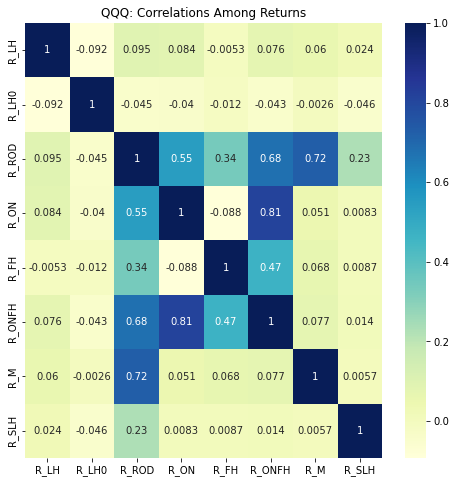

In [20]:
plt.figure(figsize=(8,8))
plt.title("QQQ: Correlations Among Returns")
sns.heatmap(nscoreReturns.corr(),cmap='YlGnBu',annot=True)
plt.savefig('QQQ_return_correlations.png')
plt.show()

In [16]:
nscoreReturns.to_csv("/Users/luzhang/Documents/GitHub/WrappingUp_Exploring_Intraday_Momentum/Data/QQQ_nscoreReturns.csv", index=True)

### Technical indicators calculation

In [94]:
df

,open,high,low,close,volume
time,,,,,
2007-04-25 15:41:00,46.2500,46.2700,46.25,46.27,199439.0
2007-04-25 15:42:00,46.2695,46.2695,46.25,46.26,214239.0
2007-04-25 15:43:00,46.2600,46.2600,46.24,46.25,243695.0
2007-04-25 15:44:00,46.2500,46.2600,46.24,46.25,352069.0
2007-04-25 15:45:00,46.2600,46.2600,46.25,46.26,10900.0
...,...,...,...,...,...
2018-11-01 20:59:00,171.0300,171.0300,171.03,171.03,100.0
2018-11-01 21:28:00,170.9400,170.9400,170.94,170.94,100.0
2018-11-01 21:29:00,170.9200,170.9200,170.92,170.92,200.0


In [95]:
# find the unique date
unidate=pd.to_datetime(df.index.date).unique()
unidate

DatetimeIndex(['2007-04-25', '2007-04-26', '2007-04-27', '2007-04-30',
               '2007-05-01', '2007-05-02', '2007-05-03', '2007-05-04',
               '2007-05-07', '2007-05-08',
               ...
               '2018-10-19', '2018-10-22', '2018-10-23', '2018-10-24',
               '2018-10-25', '2018-10-26', '2018-10-29', '2018-10-30',
               '2018-10-31', '2018-11-01'],
              dtype='datetime64[ns]', length=2903, freq=None)

In [96]:
# set up the time at pre close and current close -30
T_16 = '16:00:00'
T_1530='15:30:00'
T_16=pd.to_timedelta(T_16)
T_1530=pd.to_timedelta(T_1530)

In [97]:
# prepare the start and end point 
date16=unidate+T_16
date1530=unidate+T_1530

In [98]:
date16

DatetimeIndex(['2007-04-25 16:00:00', '2007-04-26 16:00:00',
               '2007-04-27 16:00:00', '2007-04-30 16:00:00',
               '2007-05-01 16:00:00', '2007-05-02 16:00:00',
               '2007-05-03 16:00:00', '2007-05-04 16:00:00',
               '2007-05-07 16:00:00', '2007-05-08 16:00:00',
               ...
               '2018-10-19 16:00:00', '2018-10-22 16:00:00',
               '2018-10-23 16:00:00', '2018-10-24 16:00:00',
               '2018-10-25 16:00:00', '2018-10-26 16:00:00',
               '2018-10-29 16:00:00', '2018-10-30 16:00:00',
               '2018-10-31 16:00:00', '2018-11-01 16:00:00'],
              dtype='datetime64[ns]', length=2903, freq=None)

In [99]:
CustomStrategy = ta.Strategy(
    name="exploratory technical indicators",
    description="macd, rsi, adx, mom, sma, mad, bbands, aroon, obv",
    ta=[
        {"kind": "macd", "fast": 15, "slow": 30},
        {"kind": "rsi","length":30},
        {"kind": "adx","length":30},
        {"kind": "mom","length":30},
        {"kind": "sma","length": 30},
        {"kind": "mad","length":30},
        {"kind": "bbands","length": 30},
        {"kind": "aroon","length":30},
        {"kind": "obv"},
    ]
)

In [101]:
test=df[date16[0]:date1530[1]]
test.ta.strategy(CustomStrategy)
test.columns

In [1]:
# long time running
techIndicators = pd.DataFrame()
#for i in range(len(unidate)-1):
    temp_df = df[date16[i]:date1530[i+1]]
    temp_df.ta.strategy(CustomStrategy)
    temp = pd.DataFrame(temp_df.mean()).T
    temp['date'] = unidate[i+1]
    techIndicators = techIndicators.append(temp)

In [103]:
techIndicators=techIndicators.set_index('date')

In [104]:
techIndicators

,open,high,low,close,volume,MACD_15_30_9,MACDh_15_30_9,MACDs_15_30_9,RSI_30,ADX_30,...,MAD_30,BBL_30_2.0,BBM_30_2.0,BBU_30_2.0,BBB_30_2.0,BBP_30_2.0,AROOND_30,AROONU_30,AROONOSC_30,OBV
date,,,,,,,,,,,,,,,,,,,,,
2007-04-26,46.475089,46.486207,46.465601,46.475549,221538.980716,0.003448,0.000331,0.003741,52.698915,18.970559,...,0.019823,46.426223,46.473393,46.520563,0.203018,0.574166,41.901902,57.437437,15.535536,-5.043432e+05
2007-04-27,46.445744,46.455469,46.434139,46.443918,206842.515068,0.001810,-0.000075,0.001838,50.861113,15.000440,...,0.024773,46.382638,46.441979,46.501319,0.255547,0.530223,52.129353,49.611940,-2.517413,3.045591e+06
2007-04-30,46.358250,46.368780,46.349186,46.357731,191903.432507,-0.006243,0.000137,-0.005847,46.613869,16.033592,...,0.022808,46.311525,46.366295,46.421065,0.236340,0.417427,61.981982,46.596597,-15.385385,3.328480e+06
2007-05-01,45.884301,45.896595,45.869469,45.882690,348904.323204,-0.000315,0.000366,0.000212,50.219560,19.986194,...,0.032727,45.792922,45.871124,45.949325,0.340938,0.498615,49.136546,47.931727,-1.204819,4.631387e+06
2007-05-02,46.417968,46.429060,46.409152,46.418980,191836.628099,0.008056,-0.000475,0.008077,54.838679,26.008139,...,0.019343,46.382760,46.428866,46.474972,0.198733,0.606869,42.132132,65.555556,23.423423,7.463612e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-26,166.513716,166.608768,166.418669,166.504475,121094.606911,-0.022187,0.000499,-0.021713,48.082108,17.790700,...,0.270206,165.822967,166.465420,167.107873,0.771328,0.482688,49.315476,48.325893,-0.989583,-8.635832e+05
2018-10-29,167.661192,167.727236,167.584713,167.656661,100152.321337,-0.041579,-0.002143,-0.040699,49.069397,21.134932,...,0.206120,167.270831,167.760630,168.250429,0.585954,0.438965,54.184492,41.822638,-12.361854,3.752398e+06
2018-10-30,163.993613,164.067253,163.917008,163.994369,88650.216426,0.008796,0.000862,0.008149,50.003432,15.254830,...,0.219608,163.461213,163.983262,164.505311,0.636614,0.505963,51.343284,50.103330,-1.239954,3.342255e+06


In [105]:
techIndicators.to_csv("../DATA/technicalIndicatorQQQ.csv")

### concat returns and technical indicators

In [109]:
import pandas as pd
Returns = pd.read_csv("../DATA/QQQ_Returns.csv")
Returns['datetime'] = pd.to_datetime(Returns.datetime)

In [110]:
Returns=Returns.rename(columns={'datetime':'date'})

In [111]:
# checking NAS
Returns.isnull().sum()
# No NAs 

date      0
R_LH      0
R_LH0     0
R_ROD     0
R_ON      0
R_FH      0
R_ONFH    0
R_M       0
R_SLH     0
dtype: int64

In [112]:
Indicators = pd.read_csv("../DATA/technicalIndicatorQQQ.csv")

In [113]:
# checking NAS
Indicators.isnull().sum()
# No NAs 

date             0
open             0
high             0
low              0
close            0
volume           0
MACD_15_30_9     0
MACDh_15_30_9    0
MACDs_15_30_9    0
RSI_30           0
ADX_30           0
DMP_30           0
DMN_30           0
MOM_30           0
SMA_30           0
MAD_30           0
BBL_30_2.0       0
BBM_30_2.0       0
BBU_30_2.0       0
BBB_30_2.0       0
BBP_30_2.0       0
AROOND_30        0
AROONU_30        0
AROONOSC_30      0
OBV              0
dtype: int64

In [114]:
Indicators['date'] = pd.to_datetime(Indicators.date)

In [115]:
Indicators

,date,open,high,low,close,volume,MACD_15_30_9,MACDh_15_30_9,MACDs_15_30_9,RSI_30,...,MAD_30,BBL_30_2.0,BBM_30_2.0,BBU_30_2.0,BBB_30_2.0,BBP_30_2.0,AROOND_30,AROONU_30,AROONOSC_30,OBV
0,2007-04-26,46.475089,46.486207,46.465601,46.475549,221538.980716,0.003448,0.000331,0.003741,52.698915,...,0.019823,46.426223,46.473393,46.520563,0.203018,0.574166,41.901902,57.437437,15.535536,-5.043432e+05
1,2007-04-27,46.445744,46.455469,46.434139,46.443918,206842.515068,0.001810,-0.000075,0.001838,50.861113,...,0.024773,46.382638,46.441979,46.501319,0.255547,0.530223,52.129353,49.611940,-2.517413,3.045591e+06
2,2007-04-30,46.358250,46.368780,46.349186,46.357731,191903.432507,-0.006243,0.000137,-0.005847,46.613869,...,0.022808,46.311525,46.366295,46.421065,0.236340,0.417427,61.981982,46.596597,-15.385385,3.328480e+06
3,2007-05-01,45.884301,45.896595,45.869469,45.882690,348904.323204,-0.000315,0.000366,0.000212,50.219560,...,0.032727,45.792922,45.871124,45.949325,0.340938,0.498615,49.136546,47.931727,-1.204819,4.631387e+06
4,2007-05-02,46.417968,46.429060,46.409152,46.418980,191836.628099,0.008056,-0.000475,0.008077,54.838679,...,0.019343,46.382760,46.428866,46.474972,0.198733,0.606869,42.132132,65.555556,23.423423,7.463612e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,2018-10-26,166.513716,166.608768,166.418669,166.504475,121094.606911,-0.022187,0.000499,-0.021713,48.082108,...,0.270206,165.822967,166.465420,167.107873,0.771328,0.482688,49.315476,48.325893,-0.989583,-8.635832e+05
2898,2018-10-29,167.661192,167.727236,167.584713,167.656661,100152.321337,-0.041579,-0.002143,-0.040699,49.069397,...,0.206120,167.270831,167.760630,168.250429,0.585954,0.438965,54.184492,41.822638,-12.361854,3.752398e+06
2899,2018-10-30,163.993613,164.067253,163.917008,163.994369,88650.216426,0.008796,0.000862,0.008149,50.003432,...,0.219608,163.461213,163.983262,164.505311,0.636614,0.505963,51.343284,50.103330,-1.239954,3.342255e+06
2900,2018-10-31,168.335043,168.395381,168.274908,168.338987,67480.752675,0.047760,-0.001132,0.047324,54.256347,...,0.170055,167.936984,168.341769,168.746553,0.480634,0.575214,41.516646,58.331278,16.814632,1.429556e+06


In [116]:
features = pd.merge(Returns, Indicators, on='date')

In [135]:
features

,date,R_LH,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH,open,...,MAD_30,BBL_30_2.0,BBM_30_2.0,BBU_30_2.0,BBB_30_2.0,BBP_30_2.0,AROOND_30,AROONU_30,AROONOSC_30,OBV
0,2007-04-27,0.000430,-0.003220,0.001077,-0.001507,0.001305,-0.000205,0.001928,-0.000645,46.445744,...,0.024773,46.382638,46.441979,46.501319,0.255547,0.530223,52.129353,49.611940,-2.517413,3.045591e+06
1,2007-04-30,-0.003253,0.000430,-0.008600,-0.000215,-0.003441,-0.003655,-0.004100,-0.000867,46.358250,...,0.022808,46.311525,46.366295,46.421065,0.236340,0.417427,61.981982,46.596597,-15.385385,3.328480e+06
2,2007-05-01,0.002393,-0.003253,0.000000,0.000218,-0.001740,-0.001523,0.003487,-0.001954,45.884301,...,0.032727,45.792922,45.871124,45.949325,0.340938,0.498615,49.136546,47.931727,-1.204819,4.631387e+06
3,2007-05-02,-0.000742,0.002393,0.009106,0.000434,0.002387,0.002822,0.007143,-0.000870,46.417968,...,0.019343,46.382760,46.428866,46.474972,0.198733,0.606869,42.132132,65.555556,23.423423,7.463612e+06
4,2007-05-03,-0.000440,-0.000742,0.003563,0.001614,-0.000645,0.000969,0.002796,-0.000204,46.586426,...,0.019750,46.541418,46.588372,46.635326,0.201597,0.528188,43.303303,53.613614,10.310310,7.236551e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,2018-10-26,0.001802,-0.004774,-0.026146,-0.033400,0.012284,-0.021526,-0.006815,0.002107,166.513716,...,0.270206,165.822967,166.465420,167.107873,0.771328,0.482688,49.315476,48.325893,-0.989583,-8.635832e+05
2870,2018-10-29,0.009122,0.001802,-0.027280,0.014209,-0.001596,0.012591,-0.029279,-0.010400,167.661192,...,0.206120,167.270831,167.760630,168.250429,0.585954,0.438965,54.184492,41.822638,-12.361854,3.752398e+06
2871,2018-10-30,0.003327,0.009122,0.009712,-0.005436,0.016213,0.010689,-0.004049,0.003095,163.993613,...,0.219608,163.461213,163.983262,164.505311,0.636614,0.505963,51.343284,50.103330,-1.239954,3.342255e+06
2872,2018-10-31,-0.006558,0.003327,0.029664,0.016158,0.007980,0.024267,0.005504,-0.000234,168.335043,...,0.170055,167.936984,168.341769,168.746553,0.480634,0.575214,41.516646,58.331278,16.814632,1.429556e+06


In [136]:
features.to_csv("../DATA/featuresQQQ.csv")

In [137]:
# uscore features on R
# import u-scored features
uscoreFeatures = pd.read_csv("../DATA/uscoredFeaturesQQQ.csv")

In [138]:
uscoreFeatures

,date,R_LH,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH,open,...,MAD_30,BBL_30_2.0,BBM_30_2.0,BBU_30_2.0,BBB_30_2.0,BBP_30_2.0,AROOND_30,AROONU_30,AROONOSC_30,OBV
0,4/27/07,0.579506,0.098643,0.503653,0.319937,0.639005,0.447286,0.602818,0.326200,0.190153,...,0.053410,0.190849,0.190153,0.188761,0.371781,0.636221,0.634482,0.338379,0.337335,0.807759
1,4/30/07,0.096555,0.579158,0.159882,0.420494,0.151183,0.231559,0.228079,0.286187,0.185978,...,0.032533,0.186674,0.185978,0.185978,0.304628,0.063500,0.971990,0.204419,0.080550,0.825852
2,5/1/07,0.870390,0.096207,0.450418,0.460508,0.284795,0.344990,0.710682,0.151879,0.174843,...,0.211726,0.175191,0.174495,0.174495,0.629958,0.423626,0.433020,0.254523,0.381176,0.893702
3,5/2/07,0.335247,0.870390,0.820981,0.481037,0.755567,0.657446,0.861691,0.284795,0.188413,...,0.009569,0.191197,0.189109,0.187022,0.173800,0.939283,0.108733,0.975818,0.953201,0.962248
4,5/3/07,0.392658,0.334899,0.631698,0.588553,0.404489,0.530097,0.670668,0.428845,0.195720,...,0.011656,0.195720,0.195720,0.195720,0.181454,0.621260,0.143876,0.577766,0.750696,0.957724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,10/26/18,0.815066,0.054454,0.026618,0.002262,0.989040,0.009569,0.155010,0.868650,0.948678,...,0.999130,0.946938,0.948678,0.949374,0.962248,0.317154,0.448330,0.269833,0.389875,0.189109
2870,10/29/18,0.984168,0.814718,0.021051,0.972338,0.302540,0.953201,0.006089,0.006437,0.951809,...,0.997042,0.951113,0.951809,0.952157,0.911100,0.119868,0.750696,0.057585,0.123695,0.850905
2871,10/30/18,0.917015,0.984168,0.838031,0.137613,0.996695,0.929889,0.230167,0.927105,0.942067,...,0.997390,0.941371,0.942067,0.942415,0.931280,0.473034,0.581942,0.362039,0.380828,0.826548
2872,10/31/18,0.030793,0.917015,0.986952,0.984168,0.969903,0.994259,0.801148,0.420494,0.953549,...,0.990431,0.952853,0.953549,0.954245,0.844642,0.862039,0.090292,0.807411,0.878740,0.613257


In [139]:
# normalize uscored features
from scipy.stats import norm
tempFeatures = uscoreFeatures.drop('date',axis=1)
nscoreFeatures = norm.ppf(tempFeatures) # normalized the u-scored returns

In [140]:
nscoreFeatures = pd.DataFrame(nscoreFeatures, columns = uscoreFeatures.columns[1:33])

In [141]:
# add date back 
nscoreFeatures['date'] = uscoreFeatures['date']
nscoreFeatures

,R_LH,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH,open,high,...,BBL_30_2.0,BBM_30_2.0,BBU_30_2.0,BBB_30_2.0,BBP_30_2.0,AROOND_30,AROONU_30,AROONOSC_30,OBV,date
0,0.200630,-1.289322,0.009158,-0.467874,0.355800,-0.132521,0.260649,-0.450429,-0.877332,-0.878615,...,-0.874772,-0.877332,-0.882470,-0.327139,0.348377,0.343747,-0.416892,-0.419748,0.869669,4/27/07
1,-1.301432,0.199740,-0.994944,-0.200630,-1.031373,-0.733723,-0.745187,-0.564560,-0.892816,-0.892816,...,-0.890221,-0.892816,-0.892816,-0.511137,-1.526037,1.910884,-0.825940,-1.401383,0.937901,4/30/07
2,1.128235,-1.303469,-0.124607,-0.099154,-0.568656,-0.398883,0.555378,-1.028408,-0.935197,-0.936548,...,-0.933847,-0.936548,-0.936548,0.331743,-0.192627,-0.168690,-0.660323,-0.302393,1.246460,5/1/07
3,-0.425470,1.128235,0.919111,-0.047551,0.692114,0.405503,1.087948,-0.568656,-0.883758,-0.883758,...,-0.873494,-0.881183,-0.888925,-0.939256,1.548784,-1.233292,1.974150,1.676717,1.777387,5/2/07
4,-0.272397,-0.426425,0.336354,0.223823,-0.241746,0.075515,0.441759,-0.179316,-0.857008,-0.857008,...,-0.857008,-0.857008,-0.857008,-0.909836,0.308791,-1.063065,0.196182,0.676681,1.724869,5/3/07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,0.896721,-1.603123,-1.933002,-2.839155,2.291740,-2.342850,-1.015178,1.120032,1.632167,1.632167,...,1.615863,1.632167,1.638811,1.777387,-0.475673,-0.129882,-0.613318,-0.279646,-0.881183,10/26/18
2870,2.148637,0.895418,-2.032514,1.916326,-0.517109,1.676717,-2.506940,-2.487235,1.662656,1.662656,...,1.655747,1.662656,1.666140,1.347557,-1.175648,0.676681,-1.575372,-1.156711,1.040321,10/29/18
2871,1.385267,2.148637,0.986396,-1.091106,2.715829,1.474962,-0.738297,1.454565,1.572363,1.572363,...,1.566386,1.572363,1.575372,1.485395,-0.067645,0.206863,-0.353014,-0.303307,0.940613,10/30/18
2872,-1.869260,1.385267,2.224780,2.148637,1.879364,2.527669,0.845730,-0.200630,1.680285,1.680285,...,1.673171,1.680285,1.687485,1.013719,1.089526,-1.338957,0.868396,1.168713,0.287818,10/31/18


In [142]:
nscoreFeatures.to_csv("../DATA/nscoredFeaturesQQQ.csv")

### FULL SAMPLE

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import scipy.special

In [144]:
nscoreFeatures = pd.read_csv("../DATA/nscoredFeaturesQQQ.csv")
nscoreFeatures = pd.DataFrame(nscoreFeatures)
nscoreFeatures

,date,R_LH,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH,open,...,MAD_30,BBL_30_2.0,BBM_30_2.0,BBU_30_2.0,BBB_30_2.0,BBP_30_2.0,AROOND_30,AROONU_30,AROONOSC_30,OBV
0,4/27/07,0.200630,-1.289322,0.009158,-0.467874,0.355800,-0.132521,0.260649,-0.450429,-0.877332,...,-1.612654,-0.874772,-0.877332,-0.882470,-0.327139,0.348377,0.343747,-0.416892,-0.419748,0.869669
1,4/30/07,-1.301432,0.199740,-0.994944,-0.200630,-1.031373,-0.733723,-0.745187,-0.564560,-0.892816,...,-1.844804,-0.890221,-0.892816,-0.892816,-0.511137,-1.526037,1.910884,-0.825940,-1.401383,0.937901
2,5/1/07,1.128235,-1.303469,-0.124607,-0.099154,-0.568656,-0.398883,0.555378,-1.028408,-0.935197,...,-0.800447,-0.933847,-0.936548,-0.936548,0.331743,-0.192627,-0.168690,-0.660323,-0.302393,1.246460
3,5/2/07,-0.425470,1.128235,0.919111,-0.047551,0.692114,0.405503,1.087948,-0.568656,-0.883758,...,-2.342850,-0.873494,-0.881183,-0.888925,-0.939256,1.548784,-1.233292,1.974150,1.676717,1.777387
4,5/3/07,-0.272397,-0.426425,0.336354,0.223823,-0.241746,0.075515,0.441759,-0.179316,-0.857008,...,-2.268275,-0.857008,-0.857008,-0.857008,-0.909836,0.308791,-1.063065,0.196182,0.676681,1.724869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,10/26/18,0.896721,-1.603123,-1.933002,-2.839155,2.291740,-2.342850,-1.015178,1.120032,1.632167,...,3.131402,1.615863,1.632167,1.638811,1.777387,-0.475673,-0.129882,-0.613318,-0.279646,-0.881183
2870,10/29/18,2.148637,0.895418,-2.032514,1.916326,-0.517109,1.676717,-2.506940,-2.487235,1.662656,...,2.752451,1.655747,1.662656,1.666140,1.347557,-1.175648,0.676681,-1.575372,-1.156711,1.040321
2871,10/30/18,1.385267,2.148637,0.986396,-1.091106,2.715829,1.474962,-0.738297,1.454565,1.572363,...,2.793184,1.566386,1.572363,1.575372,1.485395,-0.067645,0.206863,-0.353014,-0.303307,0.940613
2872,10/31/18,-1.869260,1.385267,2.224780,2.148637,1.879364,2.527669,0.845730,-0.200630,1.680285,...,2.342850,1.673171,1.680285,1.687485,1.013719,1.089526,-1.338957,0.868396,1.168713,0.287818


In [148]:
y = nscoreFeatures['R_LH']

In [149]:
X = nscoreFeatures[['MACD_15_30_9','MACDs_15_30_9','RSI_30','DMP_30','MOM_30','BBP_30_2.0',
                    'AROOND_30','OBV','R_LH0','R_ON','R_M','R_ROD']]
poly = PolynomialFeatures(interaction_only=True)
X_tr = poly.fit_transform(X)
Xt = pd.DataFrame(X_tr, columns=poly.get_feature_names(input_features=['MACD_15_30_9','MACDs_15_30_9','RSI_30','DMP_30','MOM_30','BBP_30_2.0',
                    'AROOND_30','OBV','R_LH0','R_ON','R_M','R_ROD']))

In [152]:
lr_full = sm.OLS(y, Xt).fit()

In [153]:
lr_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   R_LH   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     2.992
Date:                Mon, 27 Sep 2021   Prob (F-statistic):           1.69e-16
Time:                        17:27:22   Log-Likelihood:                -3962.1
No. Observations:                2874   AIC:                             8082.
Df Residuals:                    2795   BIC:                             8553.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
1                             -0.0121      0.028     -0.425      0.671      -0.068       0.044
MACD_15_30_9                  -0.4699      0.650     -0.722      0.470      -1.745       0.805
MACDs_15_30_9                  0.7863      0.637      1.234      0.217      -0.463       2.036
RSI_30                        -0.1720      0.083     -2.061      0.039      -0.336      -0.008
DMP_30                         0.0238      0.024      1.001      0.317      -0.023       0.071
MOM_30                        -0.3943      0.340     -1.160      0.246      -1.061       0.272
BBP_30_2.0                     0.0279      0.071      0.392      0.695      -0.112       0.168
AROOND_30                      0.0176      0.045      0.389      0.697      -0.071       0.106
OBV                            0.0275      0.022      1.223      0.221      -0.017       0.071
R_LH0                         -0.0644      0.019     -3.317      0.001      -0.103      -0.026
R_ON                           0.0622      0.032      1.945      0.052      -0.001       0.125
R_M                            0.0256      0.038      0.682      0.495      -0.048       0.099
R_ROD                          0.2237      0.066      3.370      0.001       0.094       0.354
MACD_15_30_9 MACDs_15_30_9    -2.5117      0.831     -3.023      0.003      -4.141      -0.882
MACD_15_30_9 RSI_30           -0.2665      2.254     -0.118      0.906      -4.685       4.152
MACD_15_30_9 DMP_30            1.1318      0.667      1.698      0.090      -0.175       2.439
MACD_15_30_9 MOM_30            1.3806      1.366      1.011      0.312      -1.298       4.059
MACD_15_30_9 BBP_30_2.0        2.6643      2.138      1.246      0.213      -1.527       6.856
MACD_15_30_9 AROOND_30         2.2350      1.466      1.525      0.127      -0.639       5.109
MACD_15_30_9 OBV               0.1988      0.720      0.276      0.783      -1.213       1.611
MACD_15_30_9 R_LH0             1.1080      0.566      1.956      0.051      -0.003       2.219
MACD_15_30_9 R_ON              0.4252      0.913      0.466      0.642      -1.366       2.216
MACD_15_30_9 R_M              -0.4995      1.046     -0.477      0.633      -2.551       1.552
MACD_15_30_9 R_ROD             0.2602      1.633      0.159      0.873      -2.942       3.462
MACDs_15_30_9 RSI_30          -0.2718      2.255     -0.121      0.904      -4.693       4.149
MACDs_15_30_9 DMP_30          -1.5734      0.698     -2.254      0.024      -2.942      -0.205
MACDs_15_30_9 MOM_30           0.9579      1.327      0.722      0.470      -1.644       3.560
MACDs_15_30_9 BBP_30_2.0      -1.2716      2.212     -0.575      0.566      -5.610       3.067
MACDs_15_30_9 AROOND_30       -1.7466      1.457     -1.199      0.231      -4.604       1.110
MACDs_15_30_9 OBV              0.7084      

### SUB SAMPLE

In [3]:
nscoreFeatures = pd.read_csv("../DATA/nscoredFeaturesWithCombinationQQQ.csv")

In [4]:
nscoreFeatures

,date,R_LH,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH,open,...,BBP_30_2.0,AROOND_30,AROONU_30,AROONOSC_30,OBV,combination_LH0_ON,combination_LH0_RM,combination_LH0_ROD,combination_ON_ROD,combination_ON_RM
0,4/27/07,0.200630,-1.289322,0.009158,-0.467874,0.355800,-0.132521,0.260649,-0.450429,-0.877332,...,0.348377,0.343747,-0.416892,-0.419748,0.869669,3,2,2,2,2
1,4/30/07,-1.301432,0.199740,-0.994944,-0.200630,-1.031373,-0.733723,-0.745187,-0.564560,-0.892816,...,-1.526037,1.910884,-0.825940,-1.401383,0.937901,1,1,1,3,3
2,5/1/07,1.128235,-1.303469,-0.124607,-0.099154,-0.568656,-0.398883,0.555378,-1.028408,-0.935197,...,-0.192627,-0.168690,-0.660323,-0.302393,1.246460,3,2,3,3,2
3,5/2/07,-0.425470,1.128235,0.919111,-0.047551,0.692114,0.405503,1.087948,-0.568656,-0.883758,...,1.548784,-1.233292,1.974150,1.676717,1.777387,1,0,0,2,2
4,5/3/07,-0.272397,-0.426425,0.336354,0.223823,-0.241746,0.075515,0.441759,-0.179316,-0.857008,...,0.308791,-1.063065,0.196182,0.676681,1.724869,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,10/26/18,0.896721,-1.603123,-1.933002,-2.839155,2.291740,-2.342850,-1.015178,1.120032,1.632167,...,-0.475673,-0.129882,-0.613318,-0.279646,-0.881183,3,3,3,3,3
2870,10/29/18,2.148637,0.895418,-2.032514,1.916326,-0.517109,1.676717,-2.506940,-2.487235,1.662656,...,-1.175648,0.676681,-1.575372,-1.156711,1.040321,0,1,1,1,1
2871,10/30/18,1.385267,2.148637,0.986396,-1.091106,2.715829,1.474962,-0.738297,1.454565,1.572363,...,-0.067645,0.206863,-0.353014,-0.303307,0.940613,1,1,0,2,3
2872,10/31/18,-1.869260,1.385267,2.224780,2.148637,1.879364,2.527669,0.845730,-0.200630,1.680285,...,1.089526,-1.338957,0.868396,1.168713,0.287818,0,0,0,0,0


In [5]:
lr_squares = np.zeros(4)
lr_squares_adj = np.zeros(4)
def rsquares(dataframe,directions):
    PP = directions == 0 
    PN = directions == 1 
    NP = directions == 2 
    NN = directions == 3
    sub_PP = dataframe[PP]
    sub_PN = dataframe[PN]
    sub_NP = dataframe[NP]
    sub_NN = dataframe[NN] 
    sublist = [sub_PP,sub_PN,sub_NP,sub_NN]
    lr_squares = np.zeros(4)

    for j in range(4):
        X = sublist[j][['MACD_15_30_9','MACDs_15_30_9','RSI_30','DMP_30','MOM_30','BBP_30_2.0',
                    'AROOND_30','OBV','R_LH0','R_ON','R_M','R_ROD']]
        y = sublist[j]['R_LH']
        poly = PolynomialFeatures(interaction_only=True)
        X_tr = poly.fit_transform(X)
        Xt = pd.DataFrame(X_tr, columns=poly.get_feature_names(input_features=['MACD_15_30_9','MACDs_15_30_9','RSI_30','DMP_30','MOM_30','BBP_30_2.0',
                    'AROOND_30','OBV','R_LH0','R_ON','R_M','R_ROD']))
        lr = sm.OLS(list(y), Xt).fit()
        lr_squares[j] = lr.rsquared
        lr_squares_adj[j] = lr.rsquared_adj
    return print([{'rsqures':lr_squares },
                  {'rsquare_adj': lr_squares_adj}])

#### Pair of R_LH0 and R_ON

In [6]:
rsquares(nscoreFeatures,nscoreFeatures['combination_LH0_ON'])
# results for sub_PP, sub_PN, sub_NP, sub_NN respectively

[{'rsqures': array([0.16887679, 0.19322216, 0.20764704, 0.21073897])}, {'rsquare_adj': array([0.06312212, 0.09873467, 0.11484895, 0.11031097])}]


#### Pair of R_LH0 and R_M

In [7]:
rsquares(nscoreFeatures,nscoreFeatures['combination_LH0_RM'])

[{'rsqures': array([0.16056547, 0.17321148, 0.26034184, 0.18380145])}, {'rsquare_adj': array([0.05712803, 0.07338252, 0.17103327, 0.08322722])}]


#### Pair of R_LH0 and R_ROD

In [8]:
rsquares(nscoreFeatures,nscoreFeatures['combination_LH0_ROD'])

[{'rsqures': array([0.16308749, 0.16316892, 0.25173327, 0.19549894])}, {'rsquare_adj': array([0.05813705, 0.06381911, 0.16289795, 0.09461296])}]


#### Pair of R_ON and R_ROD

In [9]:
rsquares(nscoreFeatures,nscoreFeatures['combination_ON_ROD'])

[{'rsqures': array([0.19367531, 0.232013  , 0.28173011, 0.15911999])}, {'rsquare_adj': array([0.12356012, 0.0751989 , 0.13506768, 0.08599999])}]


#### Pair of ON and R_M

In [10]:
rsquares(nscoreFeatures,nscoreFeatures['combination_ON_RM'])

[{'rsqures': array([0.211248  , 0.2008554 , 0.20124528, 0.17391653])}, {'rsquare_adj': array([0.11817288, 0.09999249, 0.10043158, 0.07643618])}]
